In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_datasets(filename, data_columns, target_column):
    df = pd.read_csv(filename)
    X, y = df[data_columns], df[target_column]
    return X, y

In [3]:
def plot_data(A, b, test = False):
    positive_indices = np.where(b == 1)[0]
    negative_indices = np.where(b == 0)[0]
    
    plt.scatter(A.iloc[positive_indices, 0], A.iloc[positive_indices, 1], marker='x', c= 'yellow' if test else 'green')
    plt.scatter(A.iloc[negative_indices, 0], A.iloc[negative_indices, 1], marker='+', c= 'blue' if test else 'red')

In [4]:
def decision_boundary(X, y, mean, std, theta):
    X_prepared = prepare_X((X-mean)/std)
    p_x = np.array([min(X_prepared[:, 1]) - 0.1, max(X_prepared[:, 2]) + 0.1])
    p_y = (-1/theta[2]) * (theta[1] * p_x + theta[0])
    
    plot_data((X-mean)/std, y)
    plt.plot(p_x, p_y)

In [5]:
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_new = (X - mean)/std
    return X_new, mean, std

In [6]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.column_stack((ones, X))
    return X_new

In [7]:
def sigmoid(z):
    g = 1/(1 + np.exp(-z))
    return g

In [8]:
def h(X, theta):
    z = np.dot(X, theta)
    return sigmoid(z)

In [9]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m ==0:
        return None
    h_X = h(X, theta)
    J = - np.sum(y * np.log(h_X) + (1 - y) * np.log(1 - h_X))/m
    return J

In [10]:
def derivative_theta(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    d_theta = np.dot(X.T, (h(X, theta) - y))/m
    return d_theta

In [11]:
def gradient_descent(X, y, theta, alpha, epsilon, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        theta = theta - alpha * derivative_theta(X, y, theta)
        J = cost_function(X, y, theta)
        J_history.append(J)
        if i % 1000 == 0 and print_J == True:
            print(J)
        if abs(J-J_history[-2]) < epsilon:
            break
    return theta, J_history

In [12]:
def predict(X, mean, std, theta):
    predictions = h(prepare_X(X), theta)
    return predictions

In [13]:
data_columns = ["exam1", "exam2"]
target_column = "submitted"
X, y = load_datasets('data/sats.csv', data_columns, target_column)
print('Training set: X={}, y={}'.format(X.shape, y.shape))

Training set: X=(100, 2), y=(100,)


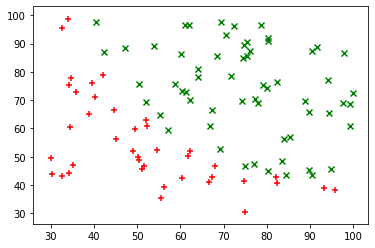

In [14]:
plot_data(X, y)

In [15]:
X_new, mean, std = normalize(X)

In [16]:
X_new = prepare_X(X_new)
y_new = y.values.reshape((X.shape[0], 1))

In [17]:
theta = np.zeros((X_new.shape[1], 1))

In [18]:
cost_function(X_new, y_new, theta)

0.6931471805599453

In [19]:
alpha = 0.01

In [20]:
new_theta, Js = gradient_descent(X_new, y_new, theta, alpha , 1e-7, 1000000, True)

0.6931471805599453
0.6916282011267486
0.31171596075390695
0.26244374394203424
0.24235585193152825
0.23135914727314405
0.2244574966823686
0.21976819110602042
0.21641207655212372
0.21392027623557286
0.2120189294010663
0.21053712829821802
0.20936269903888696
0.20841903802531114
0.2076521312135593
0.207022875788986
0.2065023325280673
0.2060686795942902
0.2057051957290057
0.20539888852207447
0.20513953936633111
0.20491902476710624
0.20473082524177744
0.20456966420174993
0.20443123856807588
0.20431201520214531


In [21]:
print(new_theta, len(Js))

[[1.56245168]
 [3.66099854]
 [3.40417088]] 24696


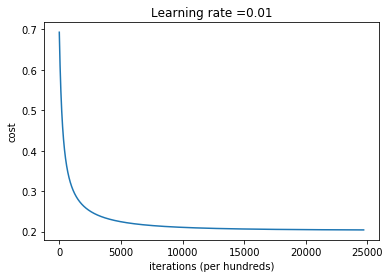

In [22]:
plt.plot(Js)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(alpha))
plt.show()

In [23]:
cost_function(X_new, y_new, new_theta)

0.2042389998529457

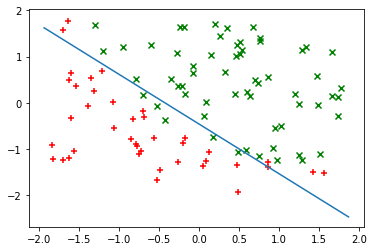

In [24]:
decision_boundary(X, y, mean, std, new_theta)

In [25]:
T = np.array([[40, 40], [60, 65]])
print(predict(T, mean, std, new_theta))

[[1.]
 [1.]]
